In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [3]:

fichero = pd.read_csv("ESTADISTICA/archive/cost-of-living.csv")

In [ ]:
# Vamos a separar los datos y centrarnos en los paises con más netradas para hacer los ejercicios,
# que son Estados Unidos, India, Brazil, Italia y Reino Unido.

In [38]:
fichero_5_paises = fichero[(fichero["country"] == "United States") | (fichero["country"] == "Italy") | (fichero["country"] == "India") | (fichero["country"] == "Brazil") | (fichero["country"] == "United Kingdom")]

Seguimos trabajando con dataset de estos días anteriores

1- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

In [ ]:
#Tabla de contingencia

In [40]:
# Sacamos el q1 y el q3 para tener de referencia y crear una columna categorica sobre la columna "x54" que es el sueldo.
# Creamos esta columna nueva porque nos será necesaria una variable categórica para crear la tabla de contingencia

q1, q3 = np.nanpercentile(fichero_5_paises["x54"], [25, 75])

In [41]:
def cat_sueldo(colum): 
    if colum <= q1:
        return "Bajo"
    elif q1 < colum <=q3:
        return "Medio"
    else:
        return "Alto"


fichero_5_paises["categoria_sueldo"] = (fichero_5_paises["x54"].apply(cat_sueldo))

/tmp/ipykernel_218/1653644931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichero_5_paises["categoria_sueldo"] = (fichero_5_paises["x54"].apply(cat_sueldo))


In [42]:
# Comprobamos que se ha creado correctamente la nueva columna categórica.

fichero_5_paises.sample()

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,categoria_sueldo
1423,1423,Wilmington,United States,15.0,55.0,8.0,3.5,5.0,3.72,2.25,...,1469.67,1275.0,2640.67,1773.5,2529.52,2066.67,3855.0,4.89,0,Medio


In [44]:
# Creamos el crosstab

tabla_contingencia_in = pd.crosstab(fichero_5_paises["categoria_sueldo"], fichero_5_paises["country"])
tabla_contingencia_in

country,Brazil,India,Italy,United Kingdom,United States
categoria_sueldo,,,,,
Alto,48,46,34,42,725
Bajo,118,121,41,1,3
Medio,0,0,110,118,346


In [ ]:
# Estos valores están "alterados" ya que se han basado para categorizar los sueldos con los cuartiles de todos los paises, de los cuales Estados Unidos 
# tienen un mayor peso, ya que tiene más de 1000 entradas respecto a los 160 de Reino Unido por ejemplo, por tanto la media no estará ajustada a todas 
# las localidades, pero para probar el ejercicio lo hemos hecho así.

In [45]:
# Correlación variables numéricas

correlacion_num_in = fichero_5_paises.corr()
correlacion_num_in

# Sabemos que esto no es legible y deberíamos crear un df reducido

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
Unnamed: 0,1.000000,0.324437,0.259917,0.304910,0.254909,0.154756,0.227787,0.313800,0.311531,0.172092,...,0.228560,0.148757,0.186831,0.131906,0.203064,0.037502,0.173655,0.188197,-0.372270,-0.483115
x1,0.324437,1.000000,0.688007,0.605854,0.591049,0.513164,0.556560,0.611807,0.638027,0.406946,...,0.496816,0.599621,0.623861,0.557094,0.590075,0.370631,0.471878,0.583059,-0.550492,-0.000738
x2,0.259917,0.688007,1.000000,0.640181,0.657371,0.589727,0.575057,0.686578,0.691620,0.462186,...,0.552493,0.695215,0.703855,0.665266,0.691166,0.474657,0.564536,0.620229,-0.600097,0.083952
x3,0.304910,0.605854,0.640181,1.000000,0.589726,0.536853,0.543149,0.678356,0.664243,0.433371,...,0.518717,0.578130,0.589276,0.536680,0.563370,0.346705,0.392183,0.539743,-0.535083,0.006836
x4,0.254909,0.591049,0.657371,0.589726,1.000000,0.709421,0.620628,0.649084,0.657811,0.415277,...,0.511090,0.688406,0.713329,0.635928,0.663065,0.475328,0.557459,0.637056,-0.548553,0.056848
x5,0.154756,0.513164,0.589727,0.536853,0.709421,1.000000,0.703144,0.570762,0.656463,0.257871,...,0.428125,0.718320,0.737078,0.686210,0.704757,0.435726,0.490206,0.670633,-0.312820,0.027415
x6,0.227787,0.556560,0.575057,0.543149,0.620628,0.703144,1.000000,0.584824,0.745825,0.184363,...,0.424657,0.697550,0.731490,0.657386,0.687780,0.326236,0.440632,0.750434,-0.271476,-0.026091
x7,0.313800,0.611807,0.686578,0.678356,0.649084,0.570762,0.584824,1.000000,0.765747,0.465570,...,0.556003,0.606735,0.639262,0.579139,0.611185,0.361564,0.419902,0.545832,-0.587539,0.035321
x8,0.311531,0.638027,0.691620,0.664243,0.657811,0.656463,0.745825,0.765747,1.000000,0.385362,...,0.527709,0.703896,0.709309,0.665682,0.682178,0.389773,0.484721,0.709261,-0.494466,-0.009523
x9,0.172092,0.406946,0.462186,0.433371,0.415277,0.257871,0.184363,0.465570,0.385362,1.000000,...,0.368678,0.370569,0.374478,0.372969,0.383260,0.376408,0.379016,0.237533,-0.449844,0.093951


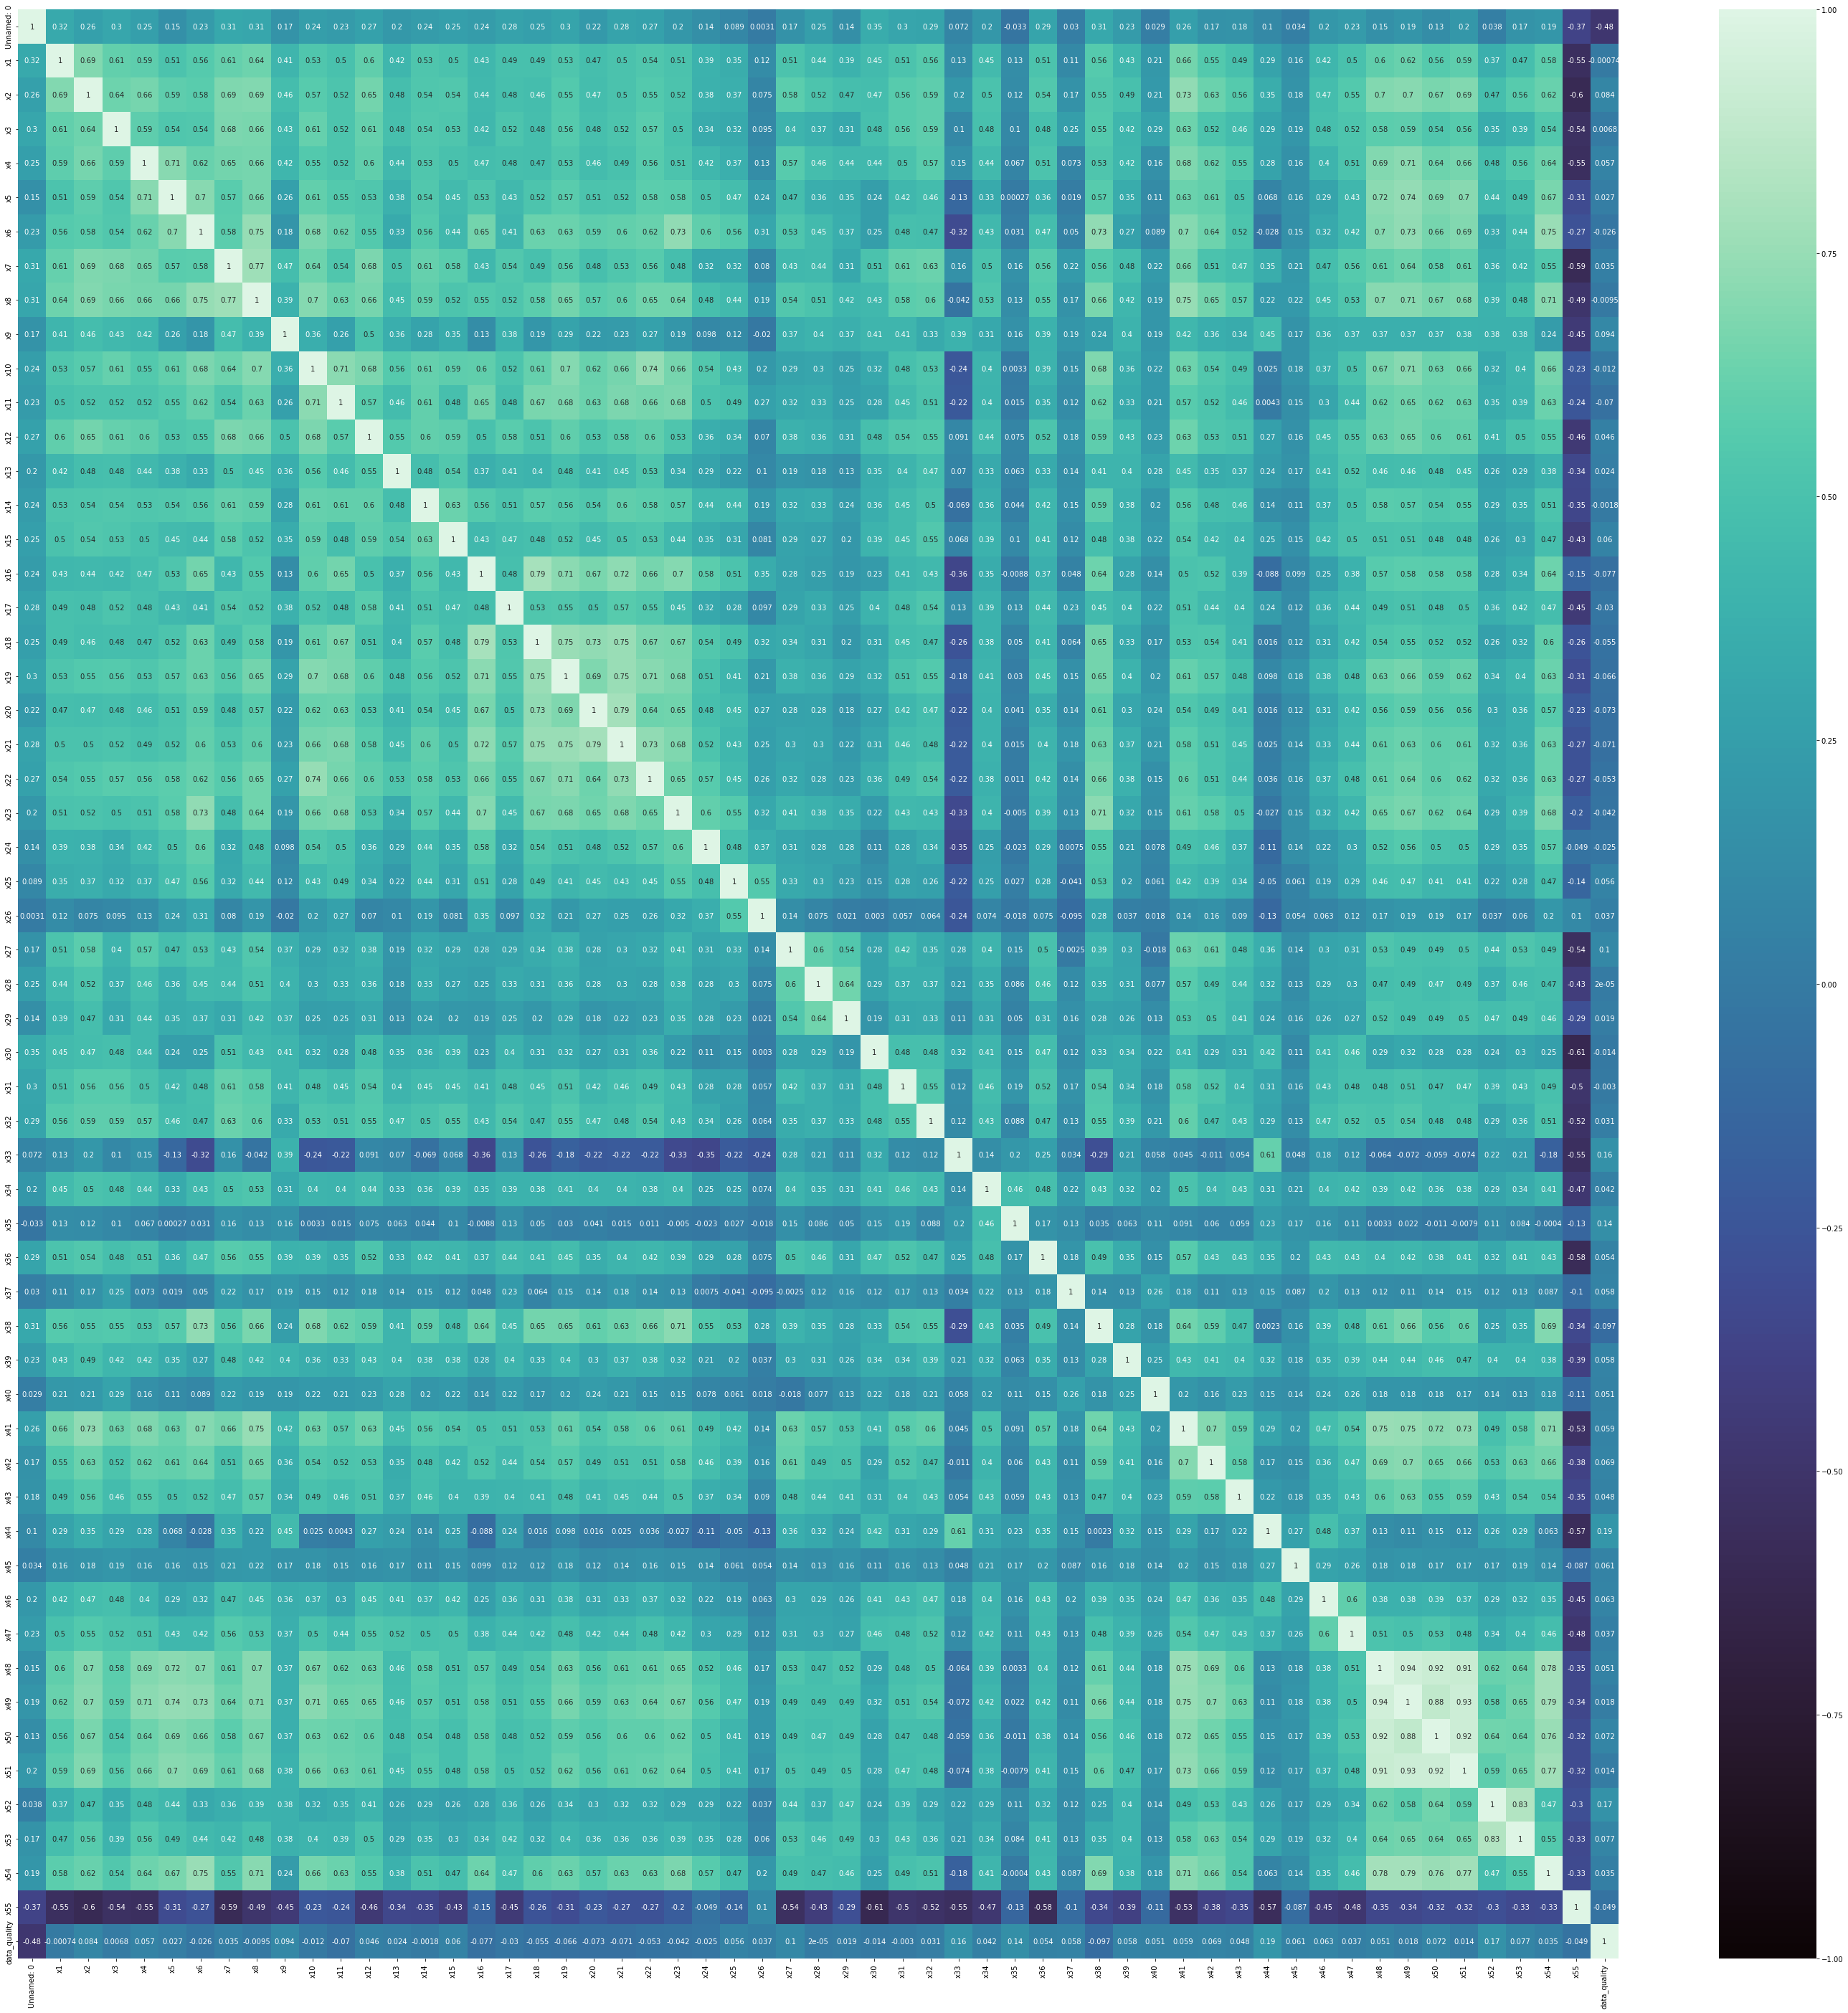

In [62]:
# Sabemos que esto es una locura para interpretarlo, pero queríamos verlo.
# Para poder tener un hetmap con más legilibilidad debería tener menos columnas

plt.figure(figsize = (50,50))

sns.heatmap(fichero_5_paises.corr(),cmap = "mako", annot = True, vmin = -1,vmax = 1);

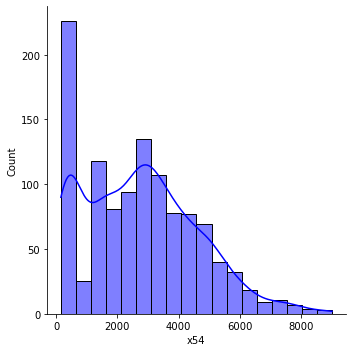

In [46]:
#fila53, con colum52
# Sesgos de alguna de las variables numéricas del dataset.

sns.displot(fichero_5_paises["x54"], color="blue", kde= True);

In [48]:
# Creamos una copia del fichero sin nan para poder calcular el skewness

fichero_5_paises_sin_nulos = fichero_5_paises.copy()

fichero_5_paises_sin_nulos = fichero_5_paises_sin_nulos.dropna(subset= ["x54"])

In [61]:
skewness = round(skew(fichero_5_paises_sin_nulos["x54"]), 2)

print(f"El sesgo para la variable sueldo es de {skewness}, vemos que es un sesgo positivo, con tendencia a la derecha")


El sesgo para la variable sueldo es de 0.52, vemos que es un sesgo positivo, con tendencia a la derecha


In [59]:
#Intervalo de confianza de algunas de las variables numéricas del dataset

datos = fichero_5_paises_sin_nulos["x54"]

intervalo_con = st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos))
print(f"El intervalo de confianza es de {intervalo_con}, que comparado con su media es {np.mean(datos)}")

El intervalo de confianza es de (2646.3437070317755, 2860.9635945555297), que comparado con su media es 2753.6536507936526


2- Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Queremos señalar que este estudio lo hemos enfocado a sacar números y sacar ejercicios para poder experimentar y ver resultados, auqnue no tienen mucho sentido los datos por el filtro que hemos realizado. Ya que la media de Estados unidos es muy alta y no nos da una realidad de paises como India o Brazil, que se alejan bastante al ver sus medias(que hemos podido ver en otros pairs), y les dan una media muy alta.

Entendemos con estos pairs y estos datos la importancia de saber categorizarlos mejor, de limpiarlos y de calcular el tiempo mejor para ajustar el ejercicio a la
realidad de tiempo y ofrecer un mejor resultado.